In [222]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('ggplot') # Look Pretty

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import svm


# Read input data

In [223]:
X=pd.read_csv('motor rpm prediction jun2019.csv',sep=',',header=None,names=['time_gap','in_value','input_value','rpm'])
print(X.describe())

          time_gap     in_value  input_value          rpm
count  3987.000000  3987.000000  3987.000000  3987.000000
mean     46.051919    89.889641     0.000502    51.135332
std      29.441261    52.316008   104.015093    28.670940
min       7.000000     0.000000  -180.000000     0.000000
25%      20.000000    45.000000   -90.000000    27.030000
50%      40.000000    90.000000     0.000000    66.670000
75%      70.000000   135.000000    90.000000    71.430000
max     100.000000   180.000000   180.000000    90.910000


# Plot input data

<IPython.core.display.Javascript object>


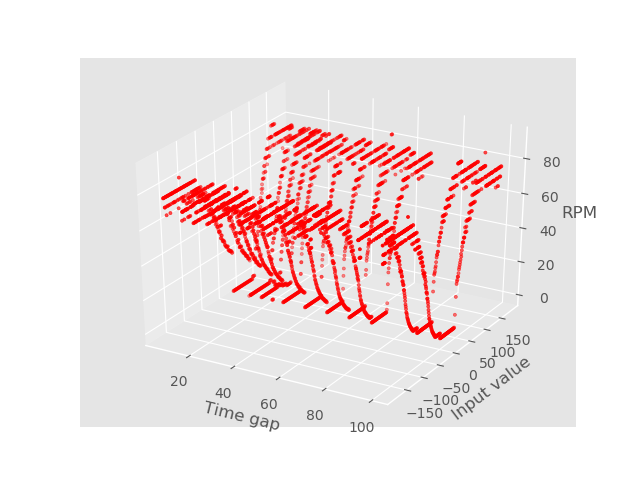

In [224]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Time gap')
ax.set_ylabel('Input value')
ax.set_zlabel('RPM')
ax.scatter(X.time_gap, X.input_value, X.rpm, c='r', marker='.')

# Create input and output dataframes

In [225]:
y=X['rpm'].copy()
X.drop(labels=['in_value','rpm'],inplace=True, axis=1)

# Split into testing and training data

In [226]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
X_train.shape

(2790, 2)

# Create SVR regression model and fit training data

In [227]:
svr=svm.SVR(kernel='rbf', C=20, gamma=0.1, epsilon=.1)
svr.fit(X_train,y_train)

SVR(C=20, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [228]:
y_predict=svr.predict(X_test)

# Print accuracy score for the model; plot actual and predicted rpm

In [229]:
score=svr.score(X_test,y_test)
print('Prediction accuracy Score = ',score)

Prediction accuracy Score =  0.9635331127677125


<IPython.core.display.Javascript object>


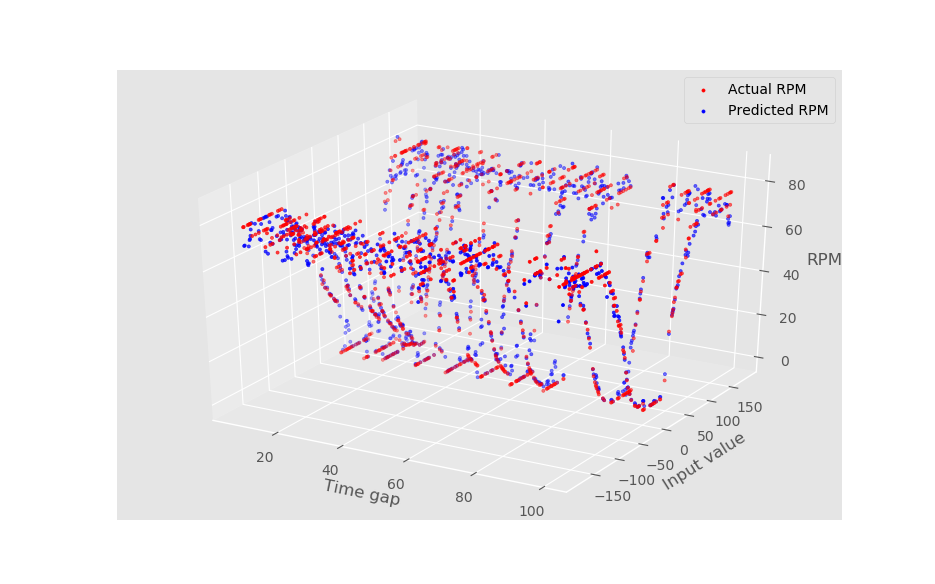

In [230]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Time gap')
ax.set_ylabel('Input value')
ax.set_zlabel('RPM')
ax.scatter(X_test.time_gap, X_test.input_value, y_test, c='r', marker='.')
ax.scatter(X_test.time_gap, X_test.input_value, y_predict, c='b', marker='.')
plt.legend(['Actual RPM','Predicted RPM'])